In [64]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Kostic Colorectal Cancer

## Refseq OTU

In [65]:
task = 'Kostic Colorectal Cancer Healthy/Tumor Refseq OTU'
folder = 'kostic-tumor'

In [66]:
num_features = 911
weights = (1, -1)

In [67]:
df1 = pd.read_csv('./'+folder+'/U6QANC_kostic_20210214_22_17_29/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/HQZXSG_kostic_20210214_23_18_01/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/ZXLLGH_kostic_20210215_00_26_44/best_test.csv', sep=';') # NoRel+CLR

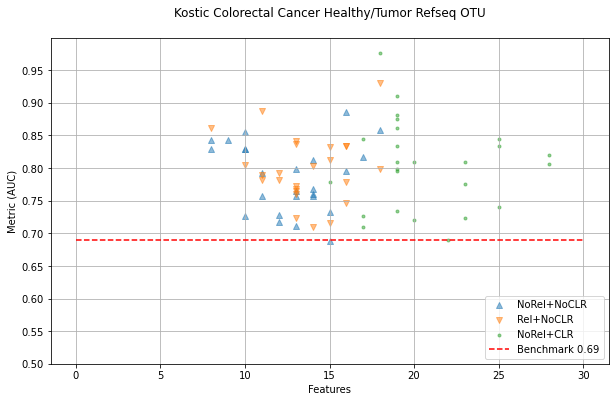

In [68]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.69, filename='./plots/kostic_tumor_refseq_otu.png', xmax=30, ylim=(0.5, 1))

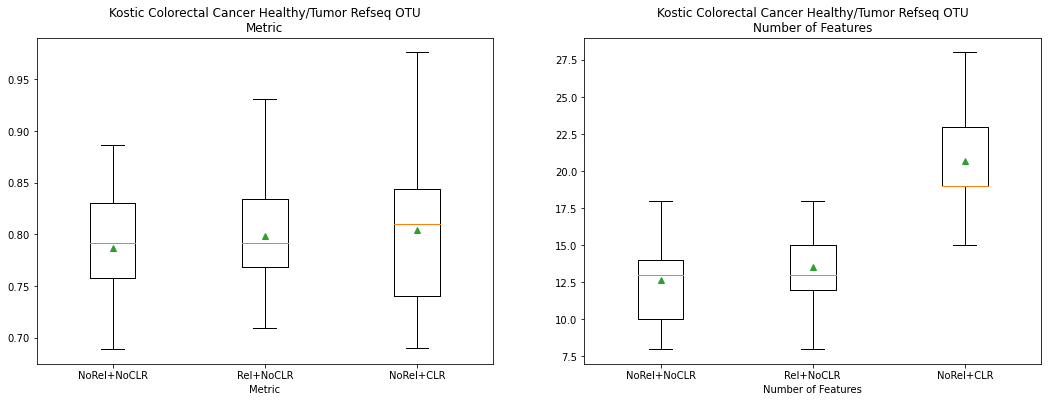

In [69]:
utils.boxplot(df1, df2, df3, num_features, weights, title=task, filename='./plots/kostic_tumor_boxplot_refseq_otu.png')

In [70]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
from tasks import *
import run_best_features

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 911)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 911)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 911)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
23,17,10,0.856,0.845,"[5, 29, 152, 348, 409, 422, 437, 446, 578, 842]",0.845,0.845,"[0.801, 0.779, 0.86, 0.808, 0.941, 0.872, 0.66...",0.835,0.647,0.965,0.066
28,21,14,0.758,0.743,"[168, 201, 211, 348, 367, 417, 437, 446, 482, ...",0.743,0.743,"[0.834, 0.849, 0.913, 0.735, 0.837, 0.86, 0.82...",0.828,0.640,0.952,0.052
16,11,18,0.858,0.838,"[1, 119, 126, 267, 270, 272, 342, 407, 409, 43...",0.838,0.838,"[0.865, 0.872, 0.879, 0.893, 0.811, 0.896, 0.8...",0.826,0.675,0.965,0.060
2,2,16,0.886,0.868,"[5, 29, 33, 117, 127, 150, 168, 437, 503, 523,...",0.868,0.868,"[0.773, 0.818, 0.901, 0.787, 0.801, 0.865, 0.8...",0.822,0.696,0.920,0.056
27,20,13,0.799,0.785,"[1, 29, 119, 208, 218, 226, 408, 437, 491, 548...",0.785,0.785,"[0.804, 0.872, 0.913, 0.836, 0.849, 0.832, 0.9...",0.818,0.701,0.941,0.059


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
0,0,13,0.841,0.827,"[5, 93, 178, 208, 266, 309, 380, 409, 734, 777...",0.827,0.827,"[0.839, 0.836, 0.808, 0.818, 0.862, 0.837, 0.6...",0.828,0.685,0.971,0.055
32,19,14,0.709,0.694,"[33, 121, 207, 213, 389, 409, 446, 511, 526, 5...",0.694,0.694,"[0.858, 0.832, 0.903, 0.791, 0.751, 0.775, 0.8...",0.810,0.630,0.955,0.060
40,24,11,0.782,0.770,"[91, 178, 348, 446, 455, 536, 548, 556, 701, 7...",0.770,0.770,"[0.837, 0.848, 0.744, 0.791, 0.796, 0.83, 0.79...",0.810,0.640,0.933,0.060
23,13,16,0.779,0.761,"[119, 314, 389, 392, 409, 520, 525, 563, 598, ...",0.761,0.761,"[0.862, 0.801, 0.92, 0.912, 0.822, 0.92, 0.685...",0.805,0.673,0.934,0.059
14,7,18,0.799,0.779,"[33, 180, 200, 208, 210, 307, 337, 407, 408, 4...",0.779,0.779,"[0.818, 0.875, 0.721, 0.846, 0.725, 0.82, 0.78...",0.803,0.675,0.901,0.053


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
29,20,19,0.810,0.789,"[1, 2, 29, 185, 243, 360, 381, 405, 409, 411, ...",0.789,0.789,"[0.82, 0.822, 0.775, 0.808, 0.882, 0.846, 0.77...",0.814,0.645,0.976,0.062
33,23,17,0.844,0.825,"[29, 45, 46, 133, 148, 153, 224, 267, 317, 409...",0.825,0.825,"[0.851, 0.9, 0.824, 0.81, 0.78, 0.818, 0.787, ...",0.807,0.602,0.934,0.066
20,14,19,0.862,0.841,"[6, 55, 93, 153, 180, 208, 222, 297, 339, 350,...",0.841,0.841,"[0.874, 0.791, 0.875, 0.849, 0.747, 0.872, 0.7...",0.801,0.644,0.948,0.057
19,13,19,0.734,0.713,"[3, 54, 60, 118, 168, 211, 243, 293, 318, 388,...",0.713,0.713,"[0.775, 0.751, 0.889, 0.829, 0.756, 0.862, 0.8...",0.799,0.654,0.958,0.061
6,5,18,0.976,0.956,"[29, 131, 307, 317, 406, 409, 446, 530, 556, 6...",0.956,0.956,"[0.618, 0.91, 0.706, 0.808, 0.825, 0.803, 0.75...",0.787,0.618,0.920,0.065


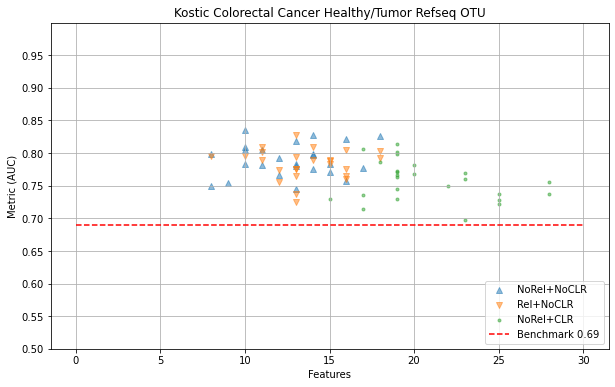

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.69, filename='./plots/kostic_tumor_refseq_otu_avg_n.png', xmax=30, ylim=(0.5, 1))

In [ ]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plots/kostic_tumor_boxplot_nruns_top1_refseq_otu.png')

---

In [5]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [6]:
folder = 'kostic-tumor'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [7]:
config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (172, 911)
Final dataset shape: (172, 911)
Final dataset shape: (172, 911)


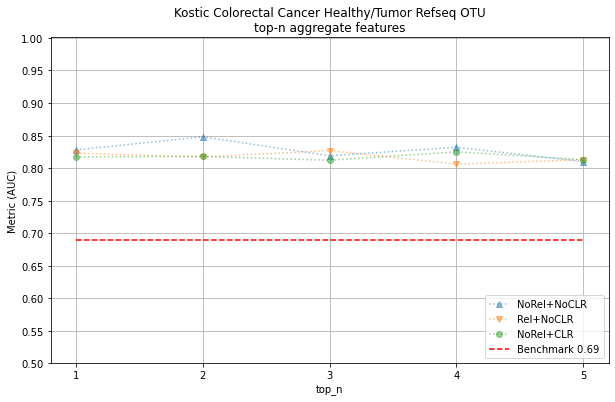

In [8]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.69, filename='./plots/kostic_tumor_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.5, 1.001), top_n=top_n)

In [9]:
best_n

{'NoRel+NoCLR': [0.828, 0.848, 0.819, 0.832, 0.81],
 'Rel+NoCLR': [0.823, 0.817, 0.827, 0.806, 0.813],
 'NoRel+CLR': [0.817, 0.818, 0.812, 0.825, 0.813]}

---

In [45]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [58]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0156       NR_104836.1_Lactobacillus_rogosae_strain_ATCC_27753_16S_ribosomal_RNA_gene__partial_sequence
          -            0.029        NR_024906.1_Enterococcus_mundtii_strain_ATCC_43186_16S_ribosomal_RNA_gene__partial_sequence
          -            0.031        NR_147375.1_Colidextribacter_massiliensis_strain_Marseille-P3083_16S_ribosomal_RNA__partial_sequence
          -            0.0313       NR_029335.1_Holdemania_filiformis_strain_J1-31B-1_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0377       NR_042745.1_Bacteroides_massiliensis_strain_B84634_16S_ribosomal_RNA_gene__partial_sequence
          -            0.046        NR_044645.2_Dorea_formicigenerans_strain_ATCC_27755_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0536       NR_104907.1_Eubacterium_coprostanoligenes_strain_HL_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0549       NR_147404.1

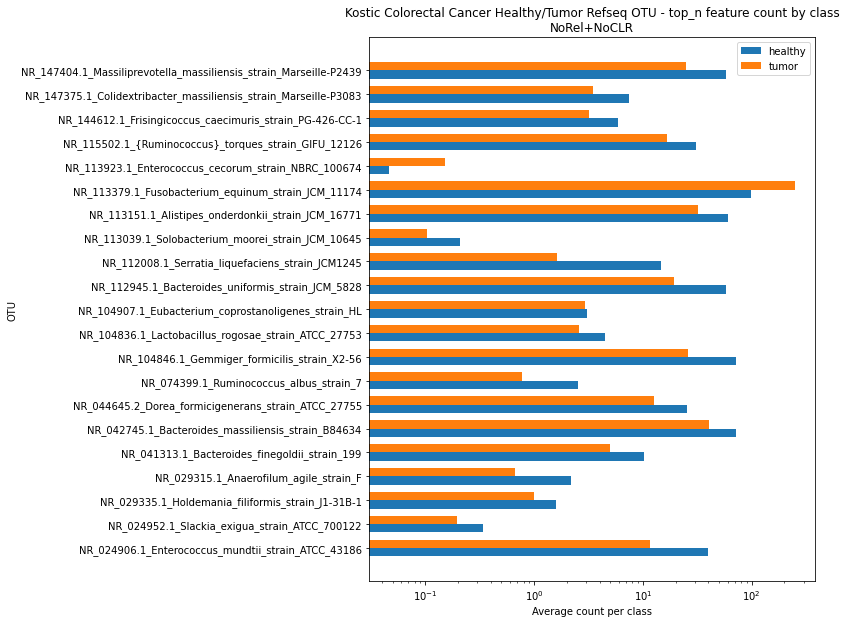

In [59]:
features = data1.features[top_n_features].astype(str)
filename = f'./plots/kostic_tumor_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,10), filename=filename, clean_otu=True)

In [60]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0221       NR_074634.1_Eubacterium_rectale_strain_ATCC_33656_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0236       NR_118667.1_Lachnospira_pectinoschiza_strain_150-1_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0303       NR_112933.1_Bacteroides_cellulosilyticus_strain_JCM_15632_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0323       NR_125589.1_Alistipes_timonensis_strain_JC136_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0349       NR_113316.1_Collinsella_aerofaciens_strain_JCM_10188_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0352       NR_024906.1_Enterococcus_mundtii_strain_ATCC_43186_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0367       NR_044645.2_Dorea_formicigenerans_strain_ATCC_27755_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0379       NR_041668.1_Barne

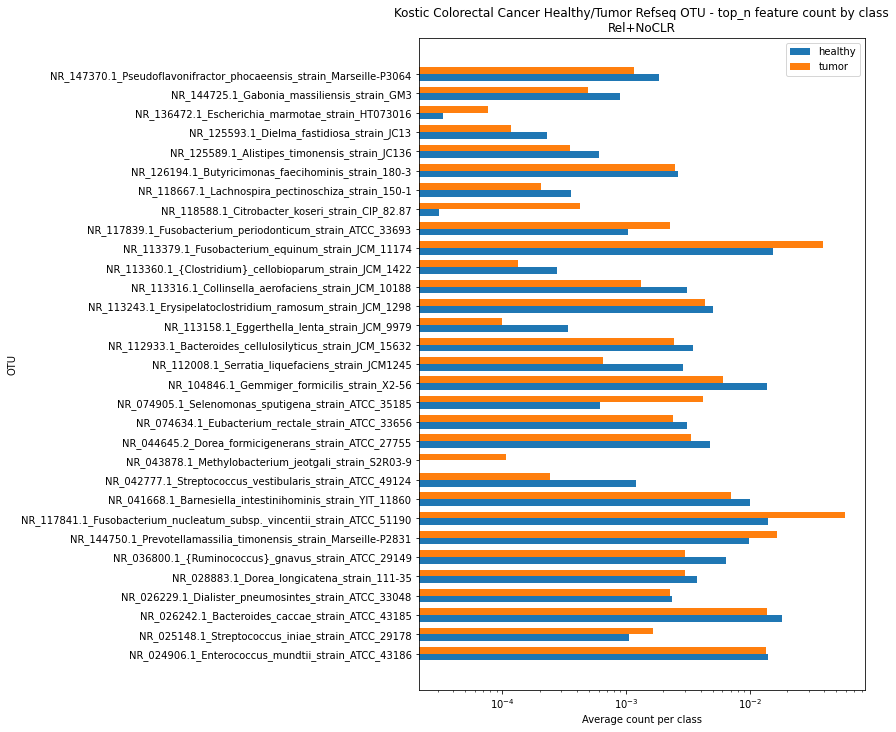

In [61]:
features = data2.features[top_n_features].astype(str)
filename = f'./plots/kostic_tumor_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,12), filename=filename, clean_otu=True)

In [62]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0019       NR_118667.1_Lachnospira_pectinoschiza_strain_150-1_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0027       NR_113378.1_Fusobacterium_nucleatum_subsp._animalis_strain_JCM_11025_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0103       NR_113065.1_Bacteroides_clarus_strain_JCM_16067_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0115       NR_042745.1_Bacteroides_massiliensis_strain_B84634_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0129       NR_042499.1_Bacteroides_xylanisolvens_strain_XB1A_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0135       NR_104799.1_Anaerostipes_hadrus_strain_DSM_3319_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0144       NR_044490.1_Butyricicoccus_pullicaecorum_strain_25-3_16S_ribosomal_RNA_gene__partial_sequence
          -            0.017        NR_043550.

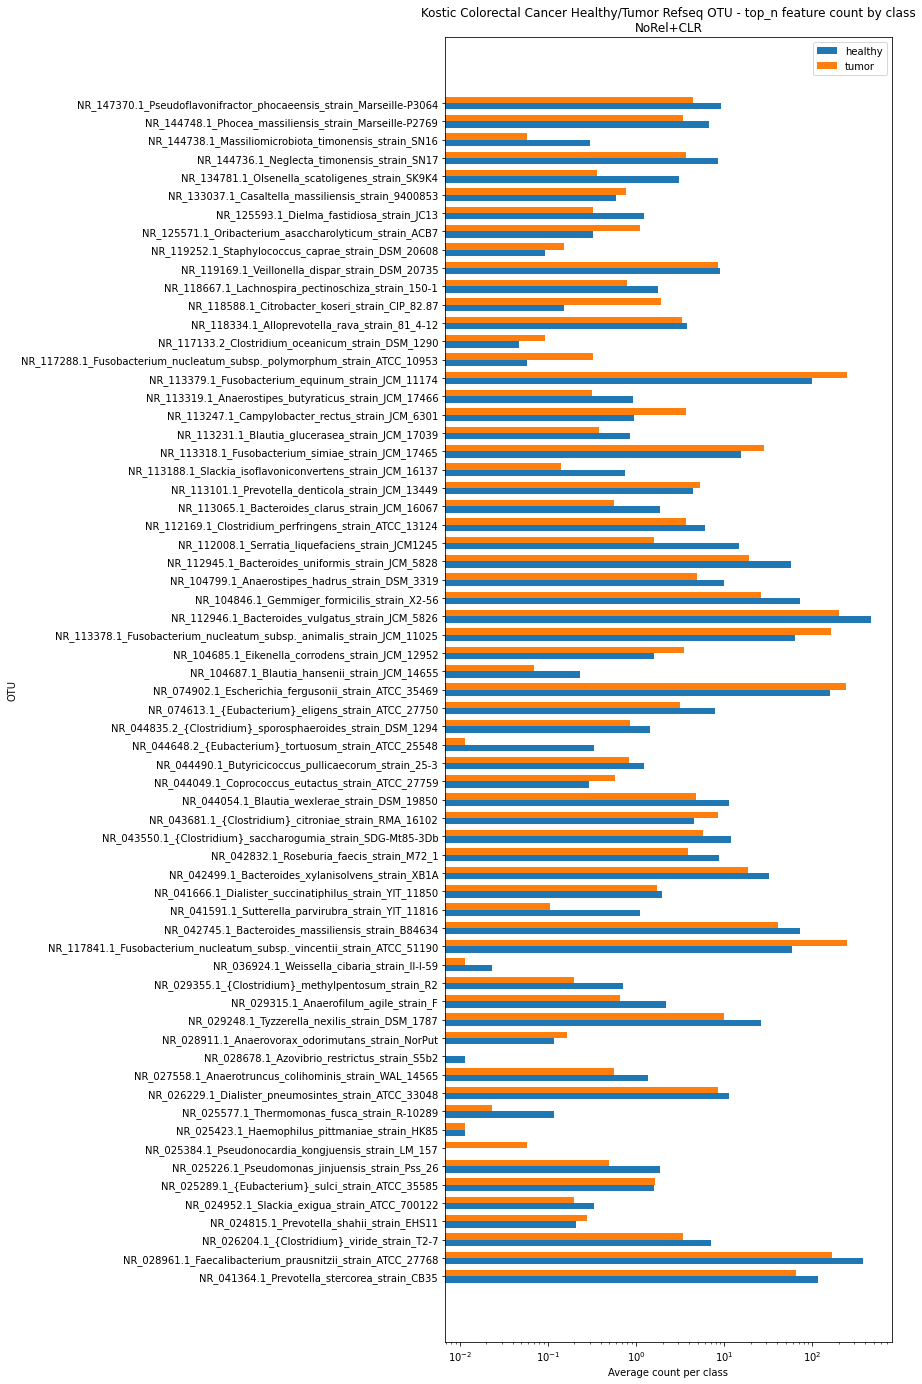

In [63]:
features = data3.features[top_n_features].astype(str)
filename = f'./plots/kostic_tumor_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,24), filename=filename, clean_otu=True)